<a href="https://colab.research.google.com/github/alfan351/alfan_protofolio/blob/main/Wordcount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# URL Google Sheets yang sudah dipublish dalam format CSV
sheet_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRO7-SZ_mhYhsqlw80AWaLWbMdAJXKt71Go-uRwOELlmHdLDqu4FGycyHSeZtcv4fOZYjpi_zlOKb2B/pub?output=csv"

# Membaca data langsung dari URL
df = pd.read_csv(sheet_url)

# Menampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
print(df.head())


   id                                               text
0   1  Warehouse mengalami peningkatan volume barang ...
1   2  Produk yang tersedia di warehouse sangat berag...
2   3  Tingkat kepuasan pelanggan terhadap pengiriman...
3   4  Masalah stok sering terjadi pada beberapa prod...
4   5  Kami melakukan pengelolaan stok yang efisien u...


In [15]:
pip install sastrawi

In [16]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import plotly.express as px
import PIL.Image

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [17]:
# Get Dataset
dataset = pd.read_csv(sheet_url)

In [18]:
dataset.head()

,id,text
0,1,Warehouse mengalami peningkatan volume barang ...
1,2,Produk yang tersedia di warehouse sangat berag...
2,3,Tingkat kepuasan pelanggan terhadap pengiriman...
3,4,Masalah stok sering terjadi pada beberapa prod...
4,5,Kami melakukan pengelolaan stok yang efisien u...


In [19]:
# Regex pattern to match valid Indonesian words (alphabetic and hyphen)
VALID_PATTERN = re.compile(r'^[a-zA-Z\-]+$')

# Regex pattern to match words with double or triple identical adjacent letters
DOUBLE_TRIPLE_PATTERN = re.compile(r'(.)\1{1,2}')

# Step 0: Combine all text from all rows into one big text
def combine_text(df, text_column):
    return ' '.join(df[text_column])

# Step 1: Clean symbols in sentences
def clean_symbols(text):
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'https?:\/\/\S*', ' ', text, flags=re.MULTILINE)
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

# Step 2: Make sentences lowercase
def to_lowercase(text):
    return text.lower()

# Step 3: Tokenization process
def tokenize(text):
    return word_tokenize(text)

# Step 4: Remove common words in Indonesian
def remove_stopwords(tokens):
    more_stopword = ['dengan', 'ia','bahwa','oleh', 'alamat', 'no', 'telp',
                     'notelp', 'noto', 'wa', 'nama', 'jl', 'cara', 'kota', 'karna',
                     'januari', 'februari', 'maret', 'april', 'mei', 'juni', 'agustus',
                     'september', 'oktober', 'november', 'desember']

    stop_words = set(stopwords.words('indonesian') + more_stopword)
    # stop_words = stop_words+more_stopword

    common_names = set([
    'agus', 'andi', 'budi', 'cahyo', 'dedi', 'edi', 'farid', 'gina', 'hadi',
    'iwan', 'joko', 'kiki', 'lisa', 'mira', 'nina', 'oko', 'putri', 'ratna',
    'sari', 'tini', 'usman', 'vina', 'wawan', 'yani', 'zain', 'indra', 'ikhsan',
    'praja', 'prayitno', 'adi', 'nanda', 'adnan'])

    indonesian_cities = set([
    'jakarta', 'bandung', 'surabaya', 'medan', 'bekasi', 'tangerang',
    'depok', 'semarang', 'palembang', 'makassar', 'bogor', 'malang',
    'gresik', 'jatiasih', 'cikampek', 'karawang'])

    return [word for word in tokens if word not in stop_words
                                        and word not in common_names
                                        and word not in indonesian_cities]

# Step 5: Apply stemming and lemmatization
def stem_and_lemmatize(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(word) for word in tokens]

# Step 6: Remove invalid words using regex
def remove_invalid_words(tokens):
    # Remove words that do not match valid pattern or contain double/triple identical letters
    return [
        word for word in tokens
        if len(word) > 3 and VALID_PATTERN.match(word)
        and not DOUBLE_TRIPLE_PATTERN.search(word)
    ]

# Step 7: Combine all clean words into sentences and combine them into a list
def tokens_to_sentence(tokens):
    return ' '.join(tokens)

# Step 8: Create a count vector to calculate the frequency of each word in the big text with N-grams
def count_vectorize(text, ngram_range=(1, 2)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    return X, vectorizer.get_feature_names_out()

In [20]:
def word_frequencies(dataset, column, type, n_gram):
    big_text = combine_text(dataset, column)

    # Step 1
    clean_text = clean_symbols(big_text)

    # Step 2
    clean_text = to_lowercase(clean_text)

    # Step 3
    tokens = tokenize(clean_text)

    # Step 4
    tokens = remove_stopwords(tokens)

    # Step 5
    tokens = stem_and_lemmatize(tokens)

    # Step 6
    tokens = remove_invalid_words(tokens)

    # Step 7
    clean_sentence = tokens_to_sentence(tokens)

    # Step 8
    count_vector, feature_names = count_vectorize(clean_sentence, ngram_range=(n_gram, n_gram))


    # Display frequencies
    word_freq = count_vector.toarray().flatten()
    freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_freq, 'Type':type})

    return freq_df

In [27]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
# N-Gram 1
freq_df_gram1 = word_frequencies(dataset, 'text', 'n_gram1', 1)

In [30]:
freq_df_gram1.sort_values(by='Frequency', ascending=False)

,Word,Frequency,Type
17,kirim,5,n_gram1
28,produk,5,n_gram1
2,barang,4,n_gram1
9,gudang,3,n_gram1
35,tingkat,3,n_gram1
38,warehouse,2,n_gram1
29,puas,2,n_gram1
10,habis,2,n_gram1
21,lambat,2,n_gram1
33,stok,2,n_gram1


In [41]:
# Get IQR frequencies to get top Word
q75, q25 = np.percentile(freq_df_gram1.Frequency.unique(), [75 ,25])
iqr = q75 - q25

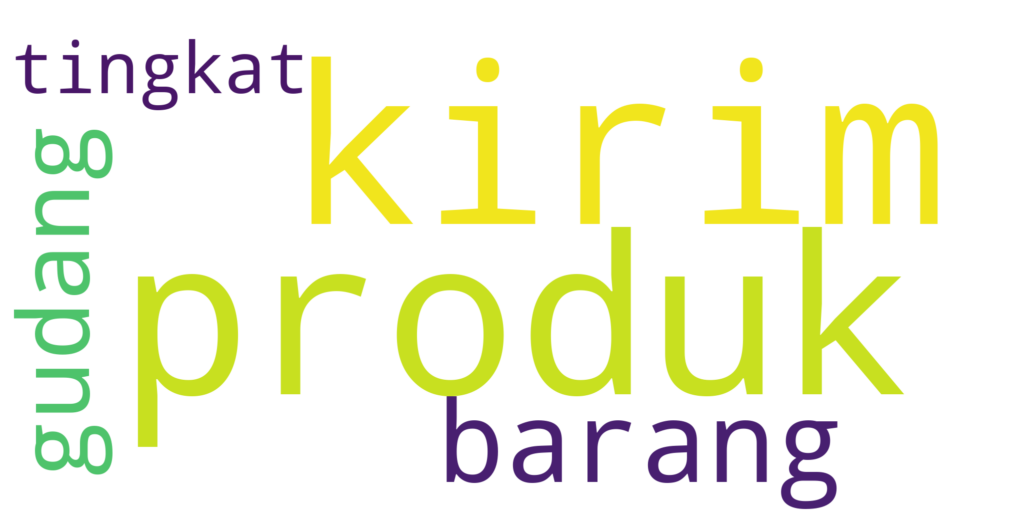

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menghasilkan WordCloud dari frekuensi kata
wordcloud = WordCloud(
    width=2000,
    height=1000,
    contour_width=1,
    background_color='white',
    max_words=100
).generate_from_frequencies(
    frequencies=dict(freq_df_gram1[freq_df_gram1.Frequency > iqr][['Word', 'Frequency']].values)
)

# Membuat figure untuk WordCloud
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='w')

# Menampilkan WordCloud
plt.imshow(wordcloud, interpolation='bilinear')

# Menyembunyikan axis
plt.axis('off')

# Mengatur layout agar lebih rapat
plt.tight_layout(pad=0)

# Menampilkan hasil WordCloud
plt.show()


In [43]:
# Result of Most Important Word
freq_df_gram1[freq_df_gram1.Frequency > iqr][['Word', 'Frequency']].sort_values(by='Frequency', ascending=False)

,Word,Frequency
17,kirim,5
28,produk,5
2,barang,4
9,gudang,3
35,tingkat,3


In [45]:
# N-Gram 2
freq_df_gram2 = word_frequencies(dataset, 'text', 'n_gram2', 2)

In [46]:
# Get IQR frequencies to get top Word
q75, q25 = np.percentile(freq_df_gram2.Frequency.unique(), [75 ,25])
iqr = q75 - q25

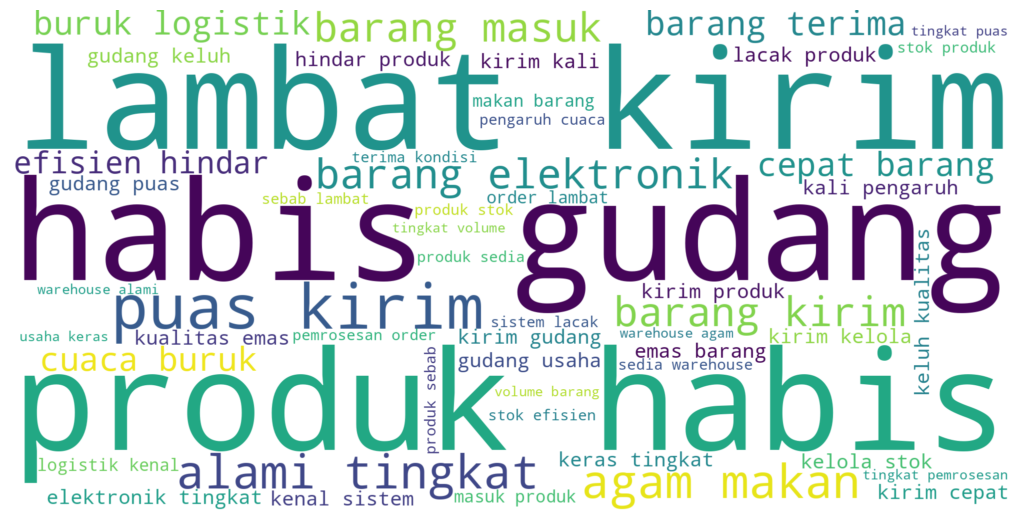

In [48]:
# Menghasilkan WordCloud dari frekuensi kata
wordcloud = WordCloud(
    width=2000,
    height=1000,
    contour_width=1,
    background_color='white',
    max_words=100
).generate_from_frequencies(
    frequencies=dict(freq_df_gram2[freq_df_gram2.Frequency > iqr][['Word', 'Frequency']].values)
)

# Membuat figure untuk WordCloud
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='w')

# Menampilkan WordCloud
plt.imshow(wordcloud, interpolation='bilinear')

# Menyembunyikan axis
plt.axis('off')

# Mengatur layout agar lebih rapat
plt.tight_layout(pad=0)

# Menampilkan hasil WordCloud
plt.show()


In [49]:
# Result of Most Important Word
freq_df_gram2[freq_df_gram2.Frequency > iqr][['Word', 'Frequency']].sort_values(by='Frequency', ascending=False)

,Word,Frequency
29,lambat kirim,2
40,puas kirim,2
36,produk habis,2
15,habis gudang,2
30,logistik kenal,1
31,makan barang,1
32,masuk produk,1
33,order lambat,1
34,pemrosesan order,1
35,pengaruh cuaca,1
